# <b><u>Merge & Groupby Operations in Pandas

## **We can merge dataframes using the following methods**

* <code> pd.concat( [df] , axis) </code>

* <code> pd.merge( df1, df2 ,on,how,suffixes) </code>

In [2]:
import pandas as pd
import numpy as np

In [3]:
imdb_df=pd.read_csv("imdb_data.csv")

In [32]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [33]:
imdb_df.drop('id',axis=1,inplace=True)

## Let us go ahead and create three subsets of our original dataset

In [4]:
# Create three dataframes
imdb1 = imdb_df[imdb_df['runtime'] >= 150]
imdb2 = imdb_df[ (imdb_df['runtime'] < 150) & (imdb_df['runtime'] > 100 )]
imdb3 = imdb_df[imdb_df['runtime'] <= 100]

In [48]:
im1=imdb1.iloc[:5,:5]
im2=imdb2.iloc[:5,:5]

In [49]:
im1.head(10)

,belongs_to_collection,budget,genres,homepage,imdb_id
47,NaN,44000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252
51,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243
76,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572
97,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980
107,NaN,72000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0112573


In [50]:
im2.head(10)

,belongs_to_collection,budget,genres,homepage,imdb_id
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152
10,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148


In [52]:
im11=pd.concat([im1,im2],axis=0)

In [53]:
im11.head(20)

,belongs_to_collection,budget,genres,homepage,imdb_id
47,NaN,44000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252
51,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243
76,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572
97,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980
107,NaN,72000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0112573
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152
10,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148


In [54]:
im12=pd.concat([im1,im2],axis=1)

In [55]:
im12.head(20)

,belongs_to_collection,budget,genres,homepage,imdb_id,belongs_to_collection,budget,genres,homepage,imdb_id
47,NaN,44000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252,NaN,NaN,NaN,NaN,NaN
51,NaN,12000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,NaN,NaN,NaN,NaN,NaN
76,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572,NaN,NaN,NaN,NaN,NaN
97,NaN,0.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980,NaN,NaN,NaN,NaN,NaN
107,NaN,72000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0112573,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933
2,NaN,NaN,NaN,NaN,NaN,NaN,3300000.0,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802
3,NaN,NaN,NaN,NaN,NaN,NaN,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480
4,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152
10,NaN,NaN,NaN,NaN,NaN,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000.0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148


In [35]:
imdb1.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
47,NaN,44000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252,en,The Hateful Eight,Bounty hunters seek shelter from a raging bliz...,20.328822,/fqe8JxDNO8B8QfOGTdjh6sPCdSC.jpg,...,12/25/15,167.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,No one comes up here without a damn good reason.,The Hateful Eight,"[{'id': 801, 'name': 'bounty hunter'}, {'id': ...","[{'cast_id': 22, 'character': 'Major Marquis W...","[{'credit_id': '538aa95ec3a368714e0005b3', 'de...",155760117
51,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,...,7/1/65,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333
76,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572,ta,Kandukondain Kandukondain,Two young women with differing views on love f...,0.660663,/AnhaX3iivU7aLc6fLuAuHXTsbgO.jpg,...,5/5/00,157.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kandukondain Kandukondain,NaN,"[{'cast_id': 1, 'character': 'Manohar', 'credi...","[{'credit_id': '52fe47c7c3a368484e0d8f41', 'de...",500000
97,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980,ru,Mishen,"In the year 2020, a group of wealthy Moscovite...",1.042112,/uMzkG73Y5qL9tiRrXnGlndOqhbJ.jpg,...,6/26/11,158.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Target,NaN,"[{'cast_id': 1001, 'character': 'Victor', 'cre...","[{'credit_id': '58cdbad4c3a36850e9011085', 'de...",73000
107,NaN,72000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0112573,en,Braveheart,"Enraged at the slaughter of Murron, his new br...",20.755149,/2qAgGeYdLjelOEqjW9FYvPHpplC.jpg,...,5/24/95,177.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Every man dies. Not every man truly lives.,Braveheart,"[{'id': 30, 'name': 'individual'}, {'id': 388,...","[{'cast_id': 5, 'character': 'William Wallace'...","[{'credit_id': '52fe4225c3a36847f80079c1', 'de...",210000000


In [36]:
imdb2.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
10,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148,en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,/i5xiwdSsrecBvO7mIfAJixeEDSg.jpg,...,11/21/76,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His whole life was a million-to-one shot.,Rocky,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",117235147


In [37]:
imdb3.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
5,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,/6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg,...,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,/4QjzFuaZmB4btGnLwAgdp23BzIU.jpg,...,8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,NaN,0,"[{'id': 99, 'name': 'Documentary'}]",NaN,tt0391024,en,Control Room,A chronicle which provides a rare window into ...,1.949044,/83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg,...,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Released,Different channels. Different truths.,Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,...,2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391


In [39]:
imdb1.shape,imdb2.shape,imdb3.shape

((135, 22), (1586, 22), (1277, 22))

In [ ]:
# Concat both axis
imdb_non_null_runtime = pd.concat([imdb1,imdb2,imdb3])

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
47,NaN,44000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252,en,The Hateful Eight,Bounty hunters seek shelter from a raging bliz...,20.328822,/fqe8JxDNO8B8QfOGTdjh6sPCdSC.jpg,"[{'name': 'Double Feature Films', 'id': 215}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",12/25/15,167.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,No one comes up here without a damn good reason.,The Hateful Eight,"[{'id': 801, 'name': 'bounty hunter'}, {'id': ...","[{'cast_id': 22, 'character': 'Major Marquis W...","[{'credit_id': '538aa95ec3a368714e0005b3', 'de...",155760117
51,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,"[{'name': 'Warner Bros.', 'id': 6194}]","[{'iso_3166_1': 'US', 'name': 'United States o...",7/1/65,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333
76,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572,ta,Kandukondain Kandukondain,Two young women with differing views on love f...,0.660663,/AnhaX3iivU7aLc6fLuAuHXTsbgO.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",5/5/00,157.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kandukondain Kandukondain,NaN,"[{'cast_id': 1, 'character': 'Manohar', 'credi...","[{'credit_id': '52fe47c7c3a368484e0d8f41', 'de...",500000
97,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980,ru,Mishen,"In the year 2020, a group of wealthy Moscovite...",1.042112,/uMzkG73Y5qL9tiRrXnGlndOqhbJ.jpg,"[{'name': 'Ren Film', 'id': 19802}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",6/26/11,158.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Target,NaN,"[{'cast_id': 1001, 'character': 'Victor', 'cre...","[{'credit_id': '58cdbad4c3a36850e9011085', 'de...",73000
107,NaN,72000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0112573,en,Braveheart,"Enraged at the slaughter of Murron, his new br...",20.755149,/2qAgGeYdLjelOEqjW9FYvPHpplC.jpg,"[{'name': 'Icon Entertainment International', ...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/24/95,177.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Every man dies. Not every man truly lives.,Braveheart,"[{'id': 30, 'name': 'individual'}, {'id': 388,...","[{'cast_id': 5, 'character': 'William Wallace'...","[{'credit_id': '52fe4225c3a36847f80079c1', 'de...",210000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,NaN,0,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0096246,en,The Terror Within,Experiments in biological warfare have destroy...,1.292125,/tyQJBO1yB2rlhgy7QGW9W459jZM.jpg,"[{'name': 'Concorde Pictures', 'id': 4527}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1/20/89,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It Wants To Get Out!,The Terror Within,"[{'id': 1299, 'name': 'monster'}, {'id': 1852,...","[{'cast_id': 4, 'character': 'Hal', 'credit_id...","[{'credit_id': '52fe45d9c3a368484e072511', 'de...",858591
2988,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0301978,fa,ده,A visual social examination in the form of ten...,0.984515,/lnleX6mbaa8aeBnIgttD49FH2PU.jpg,"[{'name': 'Abbas Kiarostami Productions', 'id'...","[{'iso_3166_1': 'IR', 'name': 'Iran'}]",5/20/02,94.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,Ten,"[{'id': 1156, 'name': 'sister sister relati

In [10]:
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  604 non-null    object 
 1   budget                 3000 non-null   int64  
 2   genres                 2993 non-null   object 
 3   homepage               946 non-null    object 
 4   imdb_id                3000 non-null   object 
 5   original_language      3000 non-null   object 
 6   original_title         3000 non-null   object 
 7   overview               2992 non-null   object 
 8   popularity             3000 non-null   float64
 9   poster_path            2999 non-null   object 
 10  production_companies   2844 non-null   object 
 11  production_countries   2945 non-null   object 
 12  release_date           3000 non-null   object 
 13  runtime                2998 non-null   float64
 14  spoken_languages       2980 non-null   object 
 15  stat

In [11]:
imdb_df.shape

(3000, 22)

In [12]:
imdb1.shape,imdb2.shape,imdb3.shape

((135, 22), (1586, 22), (1277, 22))

In [ ]:
# list_of_dfs = []
# for file_name in :
#   df = pd.read_csv("")
#   list_of_dfs.append(df)

In [ ]:
# consolidated_df = pd.concat(list_of_dfs)

In [40]:
# Concatenate along a particular axis
sample_df = pd.concat([imdb1, imdb2],axis=1)

In [43]:
# Concatenate along a particular axis
sample_df_row = pd.concat([imdb1, imdb2],axis=0)

In [41]:
sample_df.shape

(1721, 44)

In [42]:
sample_df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue', 'belongs_to_collection',
       'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue'],
      dtype='object')

In [27]:
sample_df.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
47,NaN,44000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252,en,The Hateful Eight,Bounty hunters seek shelter from a raging bliz...,20.328822,/fqe8JxDNO8B8QfOGTdjh6sPCdSC.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,NaN,12000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
76,NaN,500000.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572,ta,Kandukondain Kandukondain,Two young women with differing views on love f...,0.660663,/AnhaX3iivU7aLc6fLuAuHXTsbgO.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,0.0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980,ru,Mishen,"In the year 2020, a group of wealthy Moscovite...",1.042112,/uMzkG73Y5qL9tiRrXnGlndOqhbJ.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,72000000.0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0112573,en,Braveheart,"Enraged at the slaughter of Murron, his new br...",20.755149,/2qAgGeYdLjelOEqjW9FYvPHpplC.jpg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
1586+135

1721

In [44]:
sample_df_row.head()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
47,NaN,44000000,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...",http://thehatefuleight.com/,tt3460252,en,The Hateful Eight,Bounty hunters seek shelter from a raging bliz...,20.328822,/fqe8JxDNO8B8QfOGTdjh6sPCdSC.jpg,...,12/25/15,167.0,"[{'iso_639_1': 'es', 'name': 'Español'}, {'iso...",Released,No one comes up here without a damn good reason.,The Hateful Eight,"[{'id': 801, 'name': 'bounty hunter'}, {'id': ...","[{'cast_id': 22, 'character': 'Major Marquis W...","[{'credit_id': '538aa95ec3a368714e0005b3', 'de...",155760117
51,NaN,12000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 35, '...",NaN,tt0059243,en,The Great Race,"Professional daredevil and white-suited hero, ...",4.473327,/nc6FRAVC4a8o4podiFy2P5qI9ul.jpg,...,7/1/65,160.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,"The movie with 20,000-mile or one-million-laug...",The Great Race,"[{'id': 9253, 'name': 'slapstick'}, {'id': 159...","[{'cast_id': 1, 'character': 'Prof. Fate', 'cr...","[{'credit_id': '52fe445e9251416c75032581', 'de...",25333333
76,NaN,500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,tt0242572,ta,Kandukondain Kandukondain,Two young women with differing views on love f...,0.660663,/AnhaX3iivU7aLc6fLuAuHXTsbgO.jpg,...,5/5/00,157.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kandukondain Kandukondain,NaN,"[{'cast_id': 1, 'character': 'Manohar', 'credi...","[{'credit_id': '52fe47c7c3a368484e0d8f41', 'de...",500000
97,NaN,0,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,tt1772980,ru,Mishen,"In the year 2020, a group of wealthy Moscovite...",1.042112,/uMzkG73Y5qL9tiRrXnGlndOqhbJ.jpg,...,6/26/11,158.0,"[{'iso_639_1': 'de', 'name': 'Deutsch'}, {'iso...",Released,NaN,Target,NaN,"[{'cast_id': 1001, 'character': 'Victor', 'cre...","[{'credit_id': '58cdbad4c3a36850e9011085', 'de...",73000
107,NaN,72000000,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,tt0112573,en,Braveheart,"Enraged at the slaughter of Murron, his new br...",20.755149,/2qAgGeYdLjelOEqjW9FYvPHpplC.jpg,...,5/24/95,177.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Every man dies. Not every man truly lives.,Braveheart,"[{'id': 30, 'name': 'individual'}, {'id': 388,...","[{'cast_id': 5, 'character': 'William Wallace'...","[{'credit_id': '52fe4225c3a36847f80079c1', 'de...",210000000


In [47]:
sample_df.shape

(1721, 44)

In [ ]:
sample_df.tail()

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/18/92,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067.0
2995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687.0
2996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,/sS01LSy6KDrCZAhtkO18UdnWFT1.jpg,"[{'name': 'Memfis Film', 'id': 321}, {'name': ...","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590.0
2997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,65000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761.0
2999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35000000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,/cUT6NQP5LAJpmUoStGtXmvNt4zA.jpg,"[{'name': 'Lions Gate Films', 'id': 35}, {'nam...","[{'iso_3166_1': 'US', 'name': 'United States o...",9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155.0


In [ ]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1721 entries, 1 to 2999
Data columns (total 44 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  21 non-null     object 
 1   budget                 135 non-null    float64
 2   genres                 134 non-null    object 
 3   homepage               40 non-null     object 
 4   imdb_id                135 non-null    object 
 5   original_language      135 non-null    object 
 6   original_title         135 non-null    object 
 7   overview               135 non-null    object 
 8   popularity             135 non-null    float64
 9   poster_path            135 non-null    object 
 10  production_companies   125 non-null    object 
 11  production_countries   134 non-null    object 
 12  release_date           135 non-null    object 
 13  runtime                135 non-null    float64
 14  spoken_languages       135 non-null    object 
 15  stat

In [ ]:
sample_df.columns

Index(['belongs_to_collection', 'budget', 'genres', 'homepage', 'imdb_id',
       'original_language', 'original_title', 'overview', 'popularity',
       'poster_path', 'production_companies', 'production_countries',
       'release_date', 'runtime', 'spoken_languages', 'status', 'tagline',
       'title', 'Keywords', 'cast', 'crew', 'revenue', 'belongs_to_collection',
       'budget', 'genres', 'homepage', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'production_companies', 'production_countries', 'release_date',
       'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords',
       'cast', 'crew', 'revenue'],
      dtype='object')

In [ ]:
imdb1.shape, imdb2.shape

((135, 22), (1586, 22))

# Now let's do some joins

* ### Inner join
* ### Left join
* ### Right join
* ### Outer join

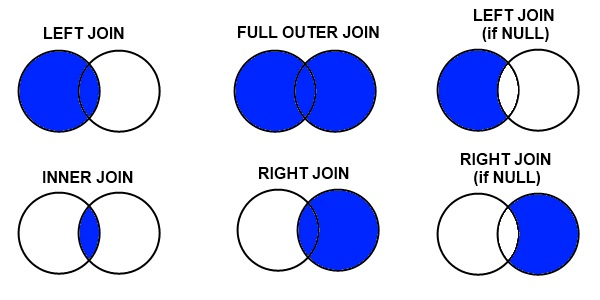

In [7]:
# Let us create a dataframe which consists of only English movies
english_movies = imdb_df[imdb_df['original_language'] == 'en']

# Next let us create another dataframe which consists of only those movies whose length is greater than 100 mins
long_movies = imdb_df.loc[imdb_df['runtime'] >= 100,['imdb_id','original_language']]

In [8]:
english_movies.shape, long_movies.shape

((2575, 23), (1820, 2))

In [9]:
type(long_movies)

pandas.core.frame.DataFrame

# <u><b> Using inner join to merge the two dataframes

In [10]:
# Merging the two dataframes using inner join
merged_IJ_df = pd.merge(english_movies, long_movies, how='inner',left_on='imdb_id',right_on='imdb_id')

In [11]:
merged_IJ_df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language_x,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,original_language_y
0,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,en
1,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,en
2,9,"[{'id': 256377, 'name': 'The Muppet Collection...",0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,...,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391,en
3,11,"[{'id': 1575, 'name': 'Rocky Collection', 'pos...",1000000,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0075148,en,Rocky,"When world heavyweight boxing champion, Apollo...",14.774066,...,119.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,His whole life was a million-to-one shot.,Rocky,"[{'id': 240, 'name': 'underdog'}, {'id': 276, ...","[{'cast_id': 16, 'character': 'Rocky Balboa', ...","[{'credit_id': '579948e9c3a36874e9007b0b', 'de...",117235147,en
4,13,NaN,15000000,"[{'id': 18, 'name': 'Drama'}]",http://www.dreamworks.com/ab/,tt0169547,en,American Beauty,"Lester Burnham, a depressed suburban father in...",20.726578,...,122.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Look closer.,American Beauty,"[{'id': 255, 'name': 'male nudity'}, {'id': 29...","[{'cast_id': 6, 'character': 'Lester Burnham',...","[{'credit_id': '52fe420ec3a36847f80007c5', 'de...",356296601,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,2994,NaN,60000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",http://www.theterminal-themovie.com/,tt0362227,en,The Terminal,Viktor Navorski is a man without a country; hi...,14.092373,...,128.0,"[{'iso_639_1': 'bg', 'name': 'български език'}...",Released,Life is waiting.,The Terminal,"[{'id': 242, 'name': 'new york'}, {'id': 822, ...","[{'cast_id': 4, 'character': 'Viktor Navorski'...","[{'credit_id': '52fe4259c3a36847f8017699', 'de...",219417255,en
1524,2995,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067,en
1525,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d

In [ ]:
temp_df = imdb_df[(imdb_df['original_language'] == 'en') & (imdb_df['runtime'] >=100)]

In [ ]:
temp_df.shape

(1528, 22)

# <u><b> Using left join to merge the two dataframes

In [12]:
# Merging the two dataframes using left join
merged_LJ_df = pd.merge(english_movies, long_movies, how='left',left_on='imdb_id',right_on='imdb_id')

In [14]:
english_movies.shape

(2575, 23)

In [15]:
merged_LJ_df

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language_x,original_title,overview,popularity,...,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,original_language_y
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,NaN
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,en
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,en
3,6,NaN,8000000,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",NaN,tt0093743,en,Pinocchio and the Emperor of the Night,"Pinocchio and his friends, a glow worm and a m...",0.743274,...,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638,NaN
4,7,NaN,14000000,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",http://www.thepossessionmovie.com/,tt0431021,en,The Possession,A young girl buys an antique box at a yard sal...,7.286477,...,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Fear The Demon That Doesn't Fear God,The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2570,2995,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,...,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067,en
2571,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687,en
2572,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761,en
2573,2999,NaN,42000000

# <u><b> Using right join to merge the two dataframes

In [ ]:
# Merging the two dataframes using right join
merged_RJ_df = pd.merge(english_movies, long_movies, how='right',left_on=['imdb_id'],right_on='imdb_id')

In [ ]:
merged_RJ_df

,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435.0
1,NaN,3300000.0,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000.0
2,NaN,NaN,NaN,NaN,tt1821480,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,tt1380152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'id': 256377, 'name': 'The Muppet Collection...",0.0,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",NaN,tt0117110,en,Muppet Treasure Island,After telling the story of Flint's last journe...,6.902423,/5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Set sail for Muppet mayhem!,Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1815,NaN,0.0,"[{'id': 18, 'name': 'Drama'}]",NaN,tt0105327,en,School Ties,When David Greene receives a football scholars...,7.438381,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/18/92,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just because you’re accepted doesn’t mean you ...,School Ties,"[{'id': 6075, 'name': 'sport'}, {'id': 10144, ...","[{'cast_id': 2, 'character': 'David Greene', '...","[{'credit_id': '5637777ac3a3681b4d01f9f5', 'de...",14715067.0
1816,NaN,0.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,/j8Q7pQ27hvH54wpxJzIuQgQCdro.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687.0
1817,NaN,NaN,NaN,NaN,tt2364975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1818,NaN,65000000.0,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,/4MENR8x6mYqnZvp2hGjSaPJz64J.jpg,"[{'name': 'New Line Cinema', 'id': 12}, {'name...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/11/96,120.

In [16]:
imdb_df[imdb_df['imdb_id']=='tt2364975']

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590


# <u><b> Using outer join to merge the two dataframes

In [18]:
# Outer Join
merged_OJ_df = pd.merge(english_movies[['imdb_id','runtime']],long_movies, on='imdb_id', how='outer')

In [19]:
merged_OJ_df

,imdb_id,runtime,original_language
0,tt2637294,93.0,NaN
1,tt0368933,113.0,en
2,tt2582802,105.0,en
3,tt0093743,83.0,NaN
4,tt0431021,92.0,NaN
...,...,...,...
2862,tt2106741,NaN,zh
2863,tt1093370,NaN,hi
2864,tt1194664,NaN,ja
2865,tt5320514,NaN,ml


# **Finally let us do some <code>groupby</code> operations**

In [39]:
# Importing datetime modules
from datetime import datetime
from datetime import date

In [21]:
def parse_string_to_date(datestring):

  return convert_to_year(datestring)

In [25]:
imdb_df['new_release_date']= imdb_df.apply(lambda x : datetime.strptime(x['release_date'],'%m/%d/%y'),axis=1)

In [40]:
def convert_to_year(datevalue):
  return datevalue.year

In [41]:
imdb_df['Year_of_release'] = imdb_df['new_release_date'].apply(convert_to_year)

In [42]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,new_release_date_2,new_release_date,Year_of_release_1,Year_of_release
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015-02-20,2015-02-20,2015,2015
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004-08-06,2004-08-06,2004,2004
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014-10-10,2014-10-10,2014,2014
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012-03-09,2012-03-09,2012,2012
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009-02-05,2009-02-05,2009,2009


In [43]:
imdb_df['new_release_date'][2].year

2014

In [44]:
imdb_df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,tagline,title,Keywords,cast,crew,revenue,new_release_date_2,new_release_date,Year_of_release_1,Year_of_release
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,2015-02-20,2015-02-20,2015,2015
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,2004-08-06,2004-08-06,2004,2004
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,2014-10-10,2014-10-10,2014,2014
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2012-03-09,2012-03-09,2012,2012
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,2009-02-05,2009-02-05,2009,2009


In [45]:
imdb_df['Year_of_release'] = np.where(imdb_df['Year_of_release'] > 2020,imdb_df['Year_of_release'] - 100,imdb_df['Year_of_release'])

In [46]:
imdb_df['Year_of_release'].unique()

array([2015, 2004, 2014, 2012, 2009, 1987, 1996, 2003, 1976, 1999, 2005,
       2002, 2010, 2013, 2011, 1998, 1982, 2006, 1992, 1997, 1986, 2007,
       2000, 1995, 1965, 1967, 2017, 1994, 2008, 1980, 1988, 2016, 1993,
       1956, 1989, 1962, 1990, 1981, 1984, 1979, 2001, 1966, 1978, 1968,
       1983, 1975, 1985, 1991, 1928, 1969, 1933, 1949, 1970, 1971, 1977,
       1940, 1954, 1957, 1953, 1932, 1960, 1948, 1958, 1961, 1959, 1952,
       1944, 1955, 1951, 1973, 1972, 1936, 1931, 1935, 1942, 1927, 1964,
       1939, 1925, 1950, 1945, 1943, 1974, 1921, 1963, 1938, 1947, 1930,
       1926, 1924], dtype=int64)

In [48]:
imdb_df['Year_of_release'].min()

1921

In [49]:
# We can find the maximum movie runtime across different years
max_runtime_movies_by_year = imdb_df.groupby('Year_of_release')['runtime'].max().reset_index()

In [50]:
max_runtime_movies_by_year

,Year_of_release,runtime
0,1921,68.0
1,1924,149.0
2,1925,137.0
3,1926,84.0
4,1927,94.0
...,...,...
85,2013,186.0
86,2014,164.0
87,2015,193.0
88,2016,162.0


In [38]:
max_runtime_movies_by_year.rename(columns = {'runtime' : 'max_runtime'},inplace=True)

In [ ]:
imdb_df.shape

(3000, 27)

In [ ]:
max_runtime_movies_by_year.head()

,Year_of_release,max_runtime
0,1921,68.0
1,1924,149.0
2,1925,137.0
3,1926,84.0
4,1927,94.0


In [53]:
# We can find the maximum movie runtime across different years
imdb_df.groupby('Year_of_release')['runtime'].min().reset_index()

,Year_of_release,runtime
0,1921,68.0
1,1924,149.0
2,1925,75.0
3,1926,84.0
4,1927,80.0
...,...,...
85,2013,0.0
86,2014,0.0
87,2015,73.0
88,2016,53.0


In [57]:
imdb_df[imdb_df['Year_of_release']==1999].transpose()

,12,108,121,280,323,364,367,384,415,515,...,2424,2591,2606,2613,2657,2703,2712,2863,2933,2949
id,13,109,122,281,324,365,368,385,416,516,...,2425,2592,2607,2614,2658,2704,2713,2864,2934,2950
belongs_to_collection,NaN,NaN,"[{'id': 106768, 'name': 'Tarzan (Animation) Co...","[{'id': 381396, 'name': 'Bats Collection', 'po...",NaN,NaN,"[{'id': 2396, 'name': 'Asterix and Obelix Coll...",NaN,NaN,"[{'id': 143757, 'name': 'Stir of Echoes Collec...",...,NaN,NaN,"[{'id': 110127, 'name': 'Analyze Collection', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
budget,15000000,14000000,150000000,0,90000000,90000000,0,55000000,60000000,12000000,...,60000000,35000000,80000000,28000000,13000000,10000000,16000000,24000000,64000000,3000000
genres,"[{'id': 18, 'name': 'Drama'}]","[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...","[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...","[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...","[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name...","[{'id': 10751, 'name': 'Family'}, {'id': 12, '...","[{'id': 18, 'name': 'Drama'}]","[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name...","[{'id': 27, 'name': 'Horror'}, {'id': 9648, 'n...",...,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...","[{'id': 35, 'name': 'Comedy'}, {'id': 80, 'nam...","[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...","[{'id': 35, 'name': 'Comedy'}]","[{'id': 35, 'name': 'Comedy'}]","[{'id': 53, 'name': 'Thriller'}, {'id': 878, '...","[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...","[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...","[{'id': 18, 'name': 'Drama'}]"
homepage,http://www.dreamworks.com/ab/,NaN,http://disneydvd.disney.go.com/tarzanr-special...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
imdb_id,tt0169547,tt0122541,tt0120855,tt0200469,tt0120784,tt0140352,tt0133385,tt0146838,tt0144214,tt0164181,...,tt0149261,tt0124298,tt0122933,tt0134618,tt0144168,tt0157503,tt0139809,tt0196857,tt0156934,tt0188030
original_language,en,en,en,en,en,en,fr,en,en,en,...,en,en,en,en,en,en,en,en,en,es
original_title,American Beauty,An Ideal Husband,Tarzan,Bats,Payback,The Insider,Astérix & Obélix contre César,Any Given Sunday,The General's Daughter,Stir of Echoes,...,Deep Blue Sea,Blast from the Past,Analyze This,"Mystery, Alaska",Dick,Drop Dead Gorgeous,The Thirteenth Floor,Play It to the Bone,Random Hearts,La lengua de las mariposas
overview,"Lester Burnham, a depressed suburban father in...",Sir Robert Chiltern is a successful Government...,Tarzan was a small orphan who was raised by an...,Genetically mutated bats escape and it's up to...,"With friends like these, who needs enemies? Th...",Tells the true story of a 60 Minutes televisio...,"Set in 50 B.C., Asterix and Obelix are living ...",A star quarterback gets knocked out of the gam...,When the body of Army Capt. Elizabeth Campbell...,"After being hypnotized by his sister in law, T...",...,On a remote former submarine refueling facilit...,Following a bomb scare in the 1960s that locke...,Countless wiseguy films are spoofed in this fi...,"In Mystery, Alaska, life revolves around the l...",Comedy about two high school girls who wander ...,"In a small Minnesota town, the annual beauty p...",Computer scientist Hannon Fuller has discovere...,"Two aging fighters in LA, friends, get a call ...",After the death of their loved ones in a tragi...,The film centres on Moncho and his coming-of-a...
popularity,20.726578,3.873796,12.453452,2.584025,9.112008,11.3569,8.150265,10.571434,14.039655,5.875606,...,7.493615,8.355977,7.634017,4.512767,3.960622,6.396767,9.356587,4.347609,4.140398,2.753674


In [ ]:
imdb_df.groupby('Year_of_release')['imdb_id'].count().median()

8.0

In [ ]:
imdb_df.groupby('Year_of_release', as_index=False).agg({"runtime": "sum"})

,Year_of_release,runtime
0,1921,68.0
1,1924,149.0
2,1925,212.0
3,1926,84.0
4,1927,174.0
...,...,...
85,2013,15350.0
86,2014,12966.0
87,2015,14328.0
88,2016,13573.0


In [ ]:
imdb_df.groupby(['Year_of_release', 'original_language'],as_index=False)

In [ ]:
# Group the data frame by month and item and extract a number of stats from each group
imdb_df.groupby(['Year_of_release', 'original_language'],as_index=False).agg({'runtime':"mean",'revenue': "sum",'imdb_id':"count"}).sort_values(by='Year_of_release').rename(columns ={'runtime':'avg_runtime','revenue':'total_revenue','imdb_id':'num_movies'})

,Year_of_release,original_language,avg_runtime,total_revenue,num_movies
0,1921,en,68.000000,2500000,1
1,1924,en,149.000000,1213880,1
2,1925,en,137.000000,1,1
3,1925,ru,75.000000,45100,1
4,1926,en,84.000000,966878,1
...,...,...,...,...,...
346,2017,ru,140.000000,9868942,1
343,2017,en,110.542857,7215048462,35
344,2017,es,91.500000,6440000,2
345,2017,fr,86.000000,7800000,1
